# Final Exam ML&AI - Programming Exercise / Julien ROMANO

Libraries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

from wordcloud import WordCloud

# PART 1

Question 1

In [2]:
dataset = "IMDB-Dataset.csv"
df = pd.read_csv(dataset)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [3]:
vectorizer = CountVectorizer(stop_words='english', min_df=20)
count = vectorizer.fit_transform(df.review)

Question 2

In [4]:
output = np.array(to_categorical(df.sentiment))

Question 3

In [5]:
x = count.toarray()
y = output

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=False)

Question 4

In [6]:
def create_mlp_model(input_size, size_layer1, size_layer2, num_classes):
    model = tf.keras.Sequential()
    model.add(Dense(size_layer1, input_shape=(input_size,), activation='relu'))
    model.add(Dense(size_layer2, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

input_size = len(x[0])
num_classes = 2
size_layer1 = 512
size_layer2 = 256 

model = create_mlp_model(input_size, size_layer1, size_layer2, num_classes)
model.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate=0.001), metrics=['acc'])

Question 5

In [7]:
history=model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 73s 2ms/sample - loss: 0.3098 - acc: 0.8721 - val_loss: 0.2678 - val_acc: 0.8904
Epoch 2/2
40000/40000 [==============================] - 66s 2ms/sample - loss: 0.1100 - acc: 0.9596 - val_loss: 0.3813 - val_acc: 0.8875


# Part 2

Question 1

In [8]:
word_index_map = vectorizer.vocabulary_

In [9]:
matrix = np.eye(len(word_index_map))
matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Question 2

In [10]:
prediction = model.predict(matrix)
prediction

array([[0.19483292, 0.80516714],
       [0.34298953, 0.6570105 ],
       [0.11910786, 0.8808921 ],
       ...,
       [0.0539936 , 0.9460064 ],
       [0.8026376 , 0.19736236],
       [0.18379396, 0.81620604]], dtype=float32)

Question 3

In [11]:
negative_counts = {}
positive_counts = {}

i=0
for j in word_index_map.keys():
    positive_counts[j] = prediction[i][1]
    negative_counts[j] = prediction[i][0]
    i +=1    

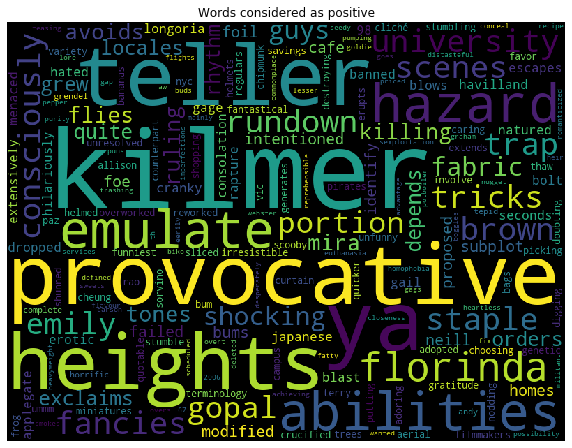

In [12]:
wc_positive = WordCloud(width=800, height=600, relative_scaling=0.5).generate_from_frequencies(positive_counts)
plt.figure(figsize=(10, 10))
plt.imshow(wc_positive)
plt.axis('off')
plt.title('Words considered as positive')
plt.show()

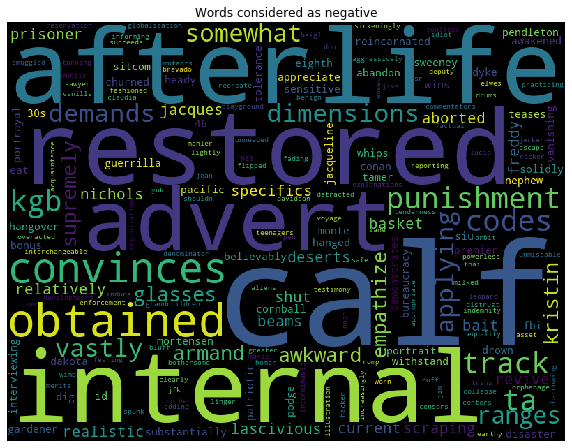

In [13]:
wc_negative = WordCloud(width=800, height=600, relative_scaling=0.5).generate_from_frequencies(negative_counts)
plt.figure(figsize=(10, 10))
plt.imshow(wc_negative)
plt.axis('off')
plt.title('Words considered as negative')
plt.show()